# Finding Interesting Patterns in the Provenance of the European Painting Collection of the Carnegie Museum of Art in Pittsburgh

The collection data of the Carnegie Museum of Art in Pittsburgh, Pennsylvania
https://github.com/cmoa/collection

Citation:David Newbury, ., davbre, ., Zac Yu, ., Tracey Berg-Fulton, ., Neil Kulas, ., & Matthew Lincoln, . (2015). collection: Multi-file JSONs (0.3.0). Zenodo. https://doi.org/10.5281/zenodo.35013
Attribution: https://creativecommons.org/publicdomain/zero/1.0/

The data set was generated and published by Carnegie Museum of Art in celebration of their 120th anniversary. The collections records contain all accessioned artworks and the metadata for the Teenie Harris Archive. This release contains data on approximately 28269 objects across all departments of the museum; fine arts, decorative arts, photography, contemporary art, and the Heinz Architectural Center. in 2021 was archived on GitHub, so could only be read.

I use the data in CSV dump (cmoa.csv & teenie.csv). The format of the metadata is described on the GitHub-Page.

My goal is to find interesting patterns in the data and some provenance details between 1933-1945.

* Initially, I had a CSV file with 28.154 items. Using OpenRefine, I narrowed my focus to 357 items, specifically interested in paintings from Europe, because they are easier to transport.
* I needed to edit the date line by eliminating strings like "c." using regex, and I cleaned up the credit line by removing unnecessary strings such as "gift of," and consolidated different writing formats of the same names.
* Additionally, I added a column with centuries based on the creation date and manually worked through it.

My primary focus is on the provenance of the artworks that changed ownership during the Second World War. To achieve this, I selected a subset of the data and compared the names in the provenance cell with the names from the black list of Art Looting Investigation Unit Reports. I'm also interested in visualizing general features of the collection to gain an overview of the subset of artworks.

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#to always display the whole text in columns)

In [4]:
cmoa = pd.read_csv("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/Carnegie_Museum_Pittsburgh_paintings_wartime.csv")
cmoa.head()

title  \
0                                                               Dr. Washington Epps, My Doctor   
1                                                                                     Elephant   
2                                    Lieutenant-General Sir Herbert Taylor, G.C.B. (1775-1839)   
3  Hero, Ursula, and Beatrice in Leonato's Garden (act 3, scene 1 from Much Ado About Nothing)   
4                                                     The Garden of Adonis - Amoretta and Time   

  creation_date century creation_date_earliest creation_date_latest  \
0          1885     19.   1885-01-01T00:00:00Z           1885-01-01   
1          1924     20.   1924-01-01T00:00:00Z           1924-01-01   
2          1806     19.   1801-01-01T00:00:00Z           1806-01-01   
3     1788-1789     18.             1788-01-01           1789-01-01   
4          1887     19.             1887-01-01           1887-01-01   

          medium accession_number  \
0  oil on canvas        2002.63.1   
1  oil on canvas        2002.63.2   
2  oil on canvas          2008.45   
3  oil on canvas          2002.77   
4  oil on canvas           2003.5   

                                                 id  \
0  cmoa:things/62a956ad-de8a-43f3-91ee-a676c0028f53   
1  cmoa:things/fbb19d5c-f380-4fd0-b1bf-1e3f2da12419   
2  cmoa:things/6cdb9534-4af6-4fc2-83fa-56866a79c772   
3  cmoa:things/43d40d11-8c87-438f-90cc-a00888c8c075   
4  cmoa:things/15e665f3-ceed-451b-b078-2c47b18bdec0   

                                                credit_line date_acquired  \
0                                         Heinz Family Fund    2002-12-05   
1                                Paintings Acquisition Fund    2002-12-05   
2                                     Margaret Evans Berdan    2008-06-05   
3  Alex C. Speyer, Jr., Darthea Speyer, and Nora Fromboluti    2003-02-06   
4                                         Heinz Family Fund    2003-02-06   

  department            physical_location  item_width  item_height  \
0  Fine Arts  Gallery 6, Scaife Galleries      20.000         25.0   
1  Fine Arts  Gallery 9, Scaife Galleries      16.375         14.0   
2  Fine Arts  Gallery 19, Bruce Galleries      25.000         30.0   
3  Fine Arts  Gallery 2, Scaife Galleries      73.500        102.0   
4  Fine Arts  Gallery 7, Scaife Galleries      50.000         41.0   

   item_depth  item_diameter  \
0        3.50            0.0   
1        2.25            0.0   
2        0.00            0.0   
3        0.00            0.0   
4        2.25            0.0   

                                                      web_url  \
0   http://collection.cmoa.org/CollectionDetail.aspx?item=557   
1   http://collection.cmoa.org/CollectionDetail.aspx?item=679   
2   http://collection.cmoa.org/CollectionDetail.aspx?item=919   
3  http://collection.cmoa.org/CollectionDetail.aspx?item=1462   
4  http://collection.cmoa.org/CollectionDetail.aspx?item=1964   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

# First step
I need to remove the birth and death dates of the individuals mentioned in the provenance research to focus solely on the years when the artworks changed ownership. These dates are mainly enclosed in square brackets '[]', which allows me to utilize a regular expression (regex) to delete all dates within the brackets.

In [5]:
cmoa["provenance_clean"]=cmoa["provenance_text"].replace(to_replace='\[[^>]+\]', value= "", regex=True)

# Second step
I would like to filter out the subset of artworks that changed ownership before and during the Second World War, specifically between the years 1933 and 1945. To achieve this, I will search for these years in the provenance column and select only the relevant entries.

In [6]:
years = ["1933", "1934", "1935", "1936", "1937", "1938", "1939","1940", "1941", "1942", "1943", "1944", "1945"]
cmoa_ed = cmoa[cmoa["provenance_clean"].str.contains('|'.join(years))]
cmoa_ed.shape

(59, 32)

# Third step
To get some insights into the subset of artworks, I visualized different features.
* Technique of the artworks
* Carrier of the artworks
* Centuries the artworks were created
* Country of origin of the artist
* Artists represented by more than one artwork in the subset of the collection
* Donors of the artworks

### Medium and Creator of the Artworks

In [7]:
cmoa_medium = cmoa_ed.groupby("medium").size()
medium = pd.DataFrame(cmoa_medium).reset_index()
medium.shape
medium

medium   0
0                             oil on Masonite   1
1                                oil on board   2
2                               oil on canvas  30
3                      oil on canvas on panel   1
4                                oil on panel  18
5                         oil on panel (icon)   1
6   opaque water-based paint mounted on board   1
7              tempera and gold leaf on panel   2
8                    tempera and oil on panel   1
9                            tempera on panel   1
10                          tempera, on linen   1

In [8]:
cmoa_oil = cmoa_ed[cmoa_ed["medium"].str.contains("oil")]
cmoa_oil.shape
#to check the number of cells including "oil" in medium.

(54, 32)

In [9]:
cmoa_tempera = cmoa_ed[cmoa_ed["medium"].str.contains("tempera")]
cmoa_tempera.shape
#to check the number of cells including "tempera" in medium.

(5, 32)

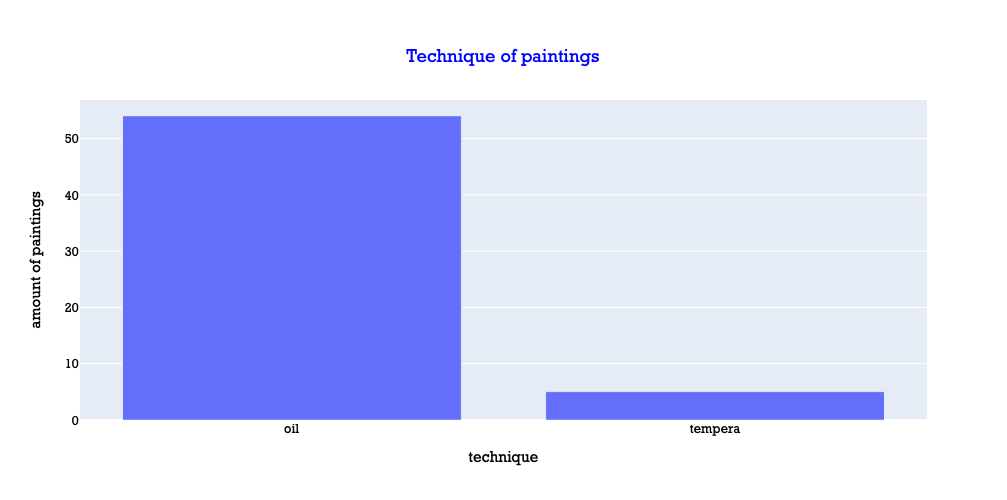

In [10]:
import plotly.express as px
technique = ["oil", "tempera"]
artworks = [54, 5]
fig = px.bar(cmoa_medium, x=technique, y=artworks, width=300, height=500, title="Technique of paintings",
    labels=dict(x="technique", y="amount of paintings", color="Place")
            )
fig.update_layout(
    font_family="Rockwell",
    font_color="black",
    title_font_family="Rockwell",
    title_font_color="blue",
    legend_title_font_color="blue")
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
#fig.update_xaxes(tickfont=dict(family='Rockwell', color='crimson', size=14))

##### Hypothesis: Tempera was the main technique until the introduction of oil in the 1400s. It is likely that most of the paintings were created after 1400.

In [11]:
cmoa_panel = cmoa_ed[cmoa_ed["medium"].str.contains("panel")]
cmoa_panel.shape

(24, 32)

In [12]:
cmoa_canvas = cmoa_ed[cmoa_ed["medium"].str.contains("canvas")]
cmoa_canvas.shape

(31, 32)

In [13]:
cmoa_board = cmoa_ed[cmoa_ed["medium"].str.contains("board")]
cmoa_board.shape

(3, 32)

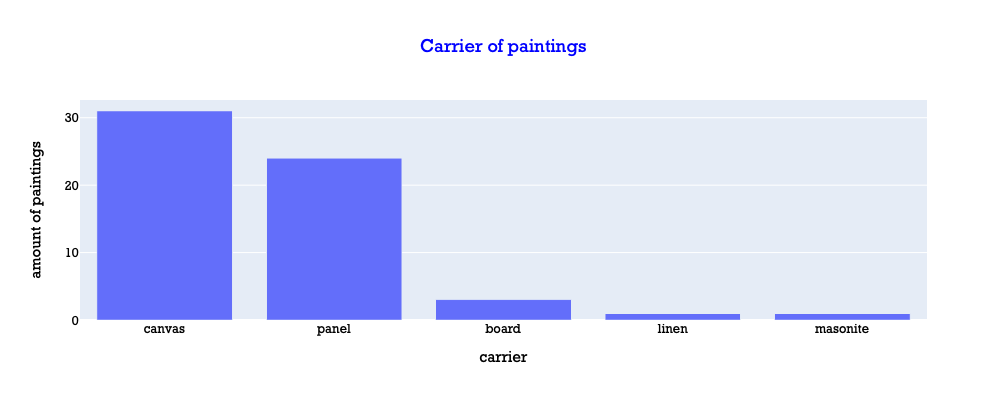

In [14]:
import plotly.express as px
carrier_cpb = ["canvas", "panel", "board", "linen", "masonite"]
amount_cpb = [31, 24, 3, 1, 1]
fig = px.bar(cmoa_medium, x=carrier_cpb, y=amount_cpb, width=600, height=400, title="Carrier of paintings",
    labels=dict(x="carrier", y="amount of paintings")
            )
fig.update_layout(
    font_family="Rockwell",
    font_color="black",
    title_font_family="Rockwell",
    title_font_color="blue",
    legend_title_font_color="blue")
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

##### Hypothesis: Canvas is easier to transport as it can be rolled. It is probable that most of the artworks are from the 18th to 20th century when canvas was more commonly used.

In [15]:
pd.set_option('display.max_rows', None)
cmoa_century = cmoa_ed.groupby("century").size()
df_century = pd.DataFrame(cmoa_century).reset_index()
df_new_century = df_century.rename(columns={0: 'amount of paintings'})
df_new_century

century  amount of paintings
0      14.                    1
1      15.                    2
2  15.-16.                    2
3      16.                   11
4  16.-17.                    1
5      17.                    9
6      18.                    5
7      19.                   13
8      20.                   15

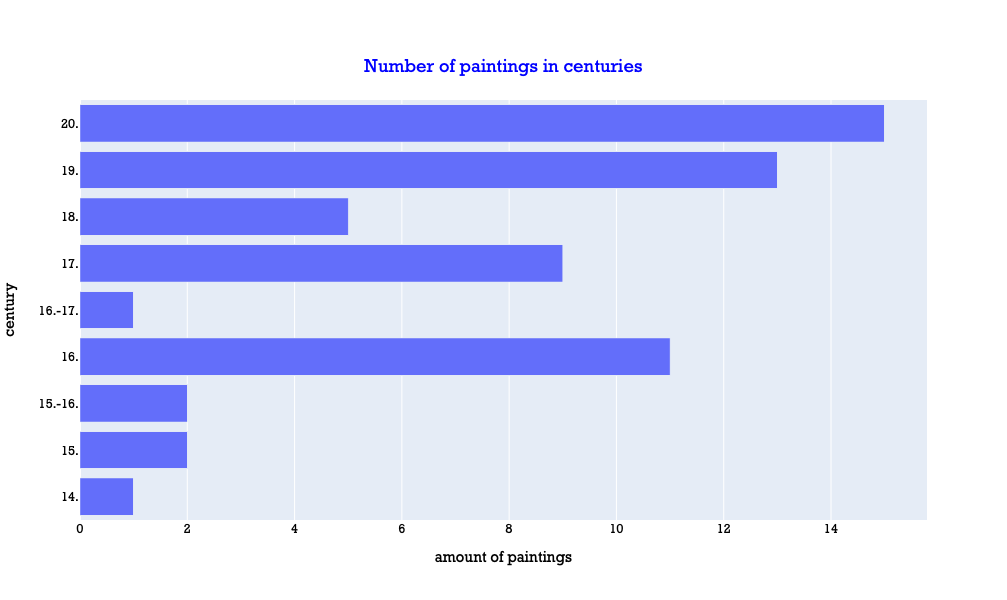

In [16]:
value_century = cmoa_ed['century'].value_counts()
fig = px.bar(df_new_century, x="amount of paintings", y="century", width=800, height=600, orientation='h', title="Number of paintings in centuries",
            )
fig.update_layout(
    font_family="Rockwell",
    font_color="black",
    title_font_family="Rockwell",
    title_font_color="blue",
    legend_title_font_color="blue",
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

##### Conclusion: The majority of the paintings are from the 19th-20th century. As previously assumed there is a very small number of paintings from the 14th century.

### Artists and Donors

In [17]:
cmoa_nationality = cmoa_ed.groupby("nationality").size()
nationality = pd.DataFrame(cmoa_nationality)
nationality_df = pd.DataFrame(cmoa_nationality).reset_index()
nationality_new = nationality_df.rename(columns={0: 'amount of artists'})
nationality_new

nationality  amount of artists
0         Belgian                  1
1         British                 10
2           Dutch                  5
3         Flemish                  9
4          French                 17
5          German                  2
6         Italian                  6
7   Netherlandish                  3
8         Russian                  2
9        Scottish                  1
10        Spanish                  3

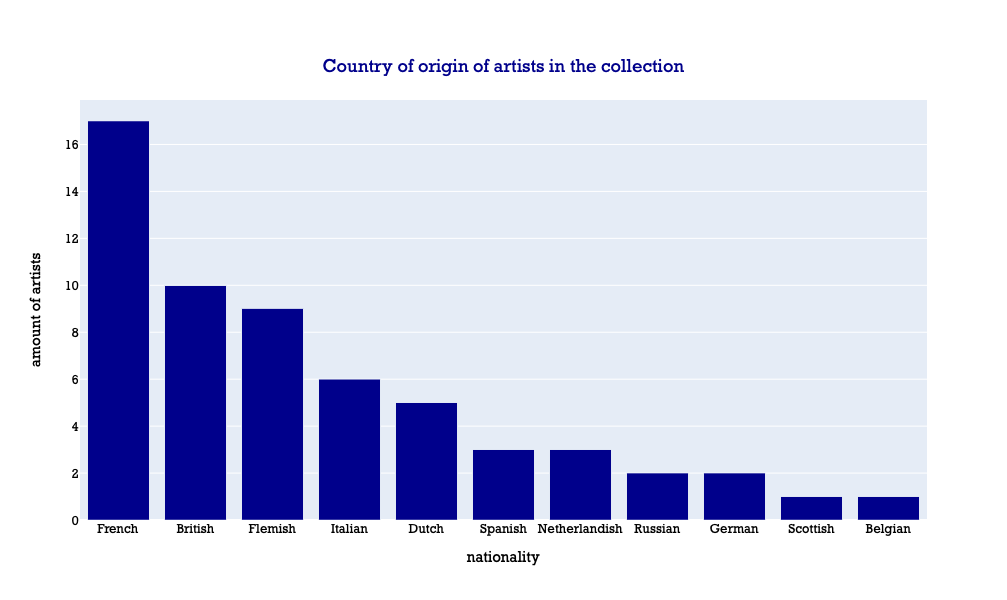

In [18]:
value_nat = cmoa_ed['nationality'].value_counts()
fig = px.bar(nationality_new, x="nationality", y="amount of artists", width=800, height=600, title="Country of origin of artists in the collection",
    labels=dict(x="nationality", y="amount of artists")
            )
fig.update_layout(
    font_family="Rockwell",
    font_color="black",
    title_font_family="Rockwell",
    title_font_color="darkblue",
    legend_title_font_color="darkblue",
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.update_traces(marker_color='darkblue')
fig.show()

In [19]:
cmoa_artist = cmoa_ed.groupby("full_name").size()
cmoa_artist_df= pd.DataFrame(cmoa_artist)
value_artist = cmoa_ed['full_name'].value_counts()
artist_more = value_artist[value_artist > 1]
artist_more_df = pd.DataFrame(artist_more).reset_index()
artists_df1 = artist_more_df.rename(columns={"index": 'name of artist'})
artists_df = artists_df1.rename(columns={"full_name": 'amount of artworks'})
artists_df

name of artist  amount of artworks
0  Gerald L. Brockhurst                   4
1      Jean-Léon Gérôme                   2
2     Peter Paul Rubens                   2
3       unknown Flemish                   2
4        unknown French                   2
5     Théobald Chartran                   2
6       unknown Russian                   2

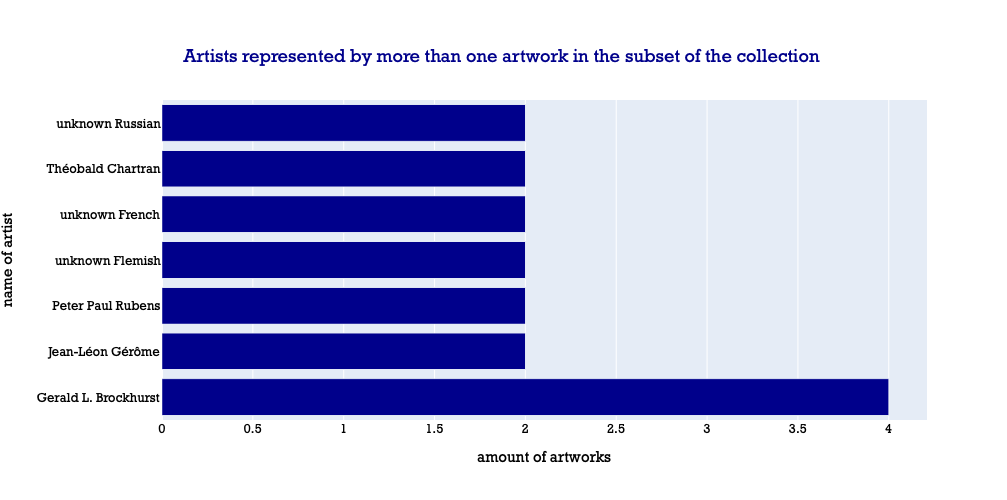

In [20]:
fig = px.bar(artists_df, x="amount of artworks", y="name of artist", width=800, height=500, orientation='h', title="Artists represented by more than one artwork in the subset of the collection"   
            )
fig.update_layout(
    font_family="Rockwell",
    font_color="black",
    title_font_family="Rockwell",
    title_font_color="darkblue",
    legend_title_font_color="darkblue",
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.update_traces(marker_color='darkblue')
fig.show()

##### Conclusion: The majority of the paintings are from French artists, including Theobald Chartran, Jean-Leon Gerome, and Unknown French artists. However, the English artist Gerald L. Brockhurst is the most well-represented artist in the subset of the Carnegie collection.

In [21]:
cmoa_credit = cmoa_ed.groupby("credit_line").size()
value_credit = cmoa_ed['credit_line'].value_counts()
credit_more = value_credit[value_credit > 1]
credit_more_ed = pd.DataFrame(credit_more).reset_index()
credit_more_ed
donors_df = credit_more_ed.rename(columns={"index": 'name of donor'})
donors = donors_df.rename(columns={"credit_line": 'amount of artworks'})
donors

name of donor  amount of artworks
0        Howard A. Noble                  23
1  Charles J. Rosenbloom                  11
2       Patrons Art Fund                   4
3          Scaife family                   3
4  Thomas H. Nimick, Jr.                   2

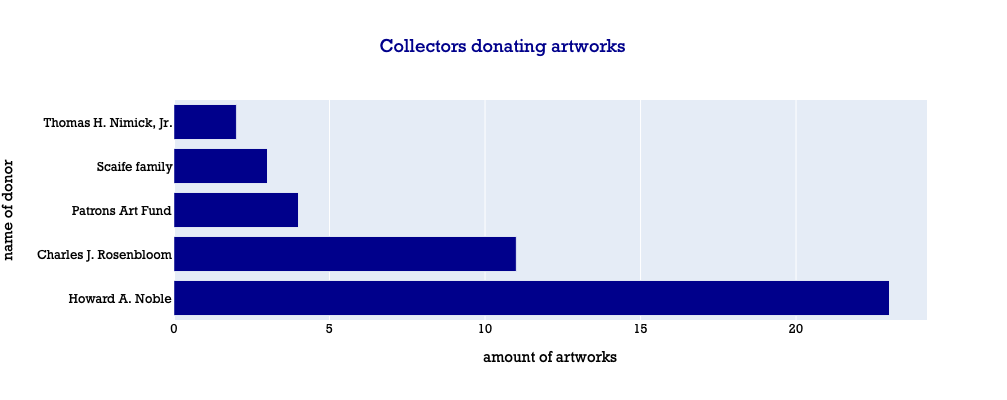

In [22]:
fig = px.bar(donors, x="amount of artworks", y="name of donor", width=800, height=400, orientation='h', title="Collectors donating artworks"   
            )
fig.update_layout(
    font_family="Rockwell",
    font_color="black",
    title_font_family="Rockwell",
    title_font_color="darkblue",
    legend_title_font_color="darkblue",
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.update_traces(marker_color='darkblue')
fig.show()

##### Conclusion: Most of the artworks are related to Howard A. Noble and Charles J. Rosenbloom.

# Forth step
Comparing the names mentioned in the provenance with the list of names published by the Art Looting Investigation Unit Report. The goal of the investigation unit was:
"It will be the primary mission of the Art Looting Investigation Unit to collect and disseminate such information bearing on the looting, confiscation and transfer by the enemy of art properties in Europe, and on individuals or organizations involved in such operations or transactions, as will be of direct aid to the United States agencies empowered to effect restitution of such properties and prosecution of war criminals." (Source: https://www.archives.gov/research/holocaust/art/oss-art-looting-investigation-unit-reports.html)

I have two lists: a list of first names and a list of last names. First, I am looking for matches with the surnames, and then I will filter the results by the first names.

In [23]:
oss_ln = pd.read_csv("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/last_names.csv")
oss_fn = pd.read_csv("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/first_names.csv")
countries = pd.read_csv("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/European_Countries.csv")
#Importing the surnames in the OSS (Office of Strategic Services) Art Looting Investigation Unit Reports Name Index

In [24]:
import numpy as np
name_list = oss_ln['last_name'].tolist()
name_list
nl = np.array(name_list)

In [29]:
cmoa_ed["name_matches"]=""
for i in name_list: 
      cmoa_ed["name_matches"] = np.where(cmoa_ed["provenance_text"].str.contains(i), i, cmoa_ed["name_matches"])
cmoa_ln=cmoa_ed[cmoa_ed["name_matches"]!=""]
cmoa_ln.shape

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/558756337.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/558756337.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/558756337.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



(17, 33)

In [30]:
firstname_list = oss_fn['first_name'].tolist()

In [32]:
cmoa_ln["firstname_matches"]=""
for i in firstname_list: 
      cmoa_ln["firstname_matches"] = np.where(cmoa_ln["provenance_text"].str.contains(i), i, cmoa_ln["firstname_matches"])
cmoa_lfn=cmoa_ln[cmoa_ln["firstname_matches"]!=""]
cmoa_lfn

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/4122140614.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/4122140614.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/4122140614.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



title       creation_date  \
110                          Portrait of an Englishwoman                1920   
114                                          Lady Turing                1797   
117                          Charlotte Marie de Gasville                1785   
132     Cavaliers returning from a fantasia near Algiers                1861   
148                    The Tribulations of Saint Anthony                1909   
176                                            The Sower          after 1850   
180                              Portrait of a Young Man  early 16th century   
182                          Vision of Saint Ildephonsus           1520-1550   
189                                  Portrait of a Woman                1639   
199                     Portrait of a Man Holding a Book                1530   
200                               Portrait of a Nobleman           1550-1600   
214                                    Bathers with Crab           1890-1899   
238  The Road to Louveciennes (La route de Louveciennes)                1874   
276                            The Adoration of the Magi                1625   
285               Forest clearing with rocks and peasant               1870s   
305                              Interior of a Cathedral                1640   

     century creation_date_earliest creation_date_latest         medium  \
110      20.             1915-01-01           1925-01-01  oil on canvas   
114      18.             1797-01-01           1797-01-01  oil on canvas   
117      18.             1785-01-01           1785-01-01  oil on canvas   
132      19.             1861-01-01           1861-01-01  oil on canvas   
148      20.             1909-01-01           1909-01-01  oil on canvas   
176      19.             1850-01-01           1875-01-01  oil on canvas   
180      16.             1511-12-22           1526-12-22   oil on panel   
182      16.             1519-12-22           1549-12-22   oil on panel   
189      17.             1639-01-01           1639-01-01   oil on panel   
199      16.             1524-12-22           1534-12-22   oil on panel   
200  16.-17.             1534-12-22           1615-01-01   oil on panel   
214      19.   1885-01-01T00:00:00Z           1904-01-01  oil on canvas   
238      19.             1874-01-01           1874-01-01  oil on canvas   
276      17.             1625-01-01           1625-01-01   oil on panel   
285      19.             1827-01-01           1876-01-01   oil on panel   
305      17.             1640-01-01           1649-01-01  oil on canvas   

    accession_number                                                id  \
110             40.2  cmoa:things/ecfd0954-e08c-44da-a31f-d513b9012fa5   
114             42.2  cmoa:things/567e36ed-b768-4258-b996-10f70130ce50   
117             44.7  cmoa:things/79ef1370-95ec-4354-98fc-a9dc576d3b88   
132            55.40  cmoa:things/29f07ca2-f28a-47a9-b820-c4811e29a6f0   
148            58.83  cmoa:things/4166c391-1fe7-4af2-a4ec-133c0957720d   
176             63.7  cmoa:things/8a1a2643-7889-49f4-ac04-5e2911d6026b   
180         64.11.13  cmoa:things/546c6e90-5bf7-4fa9-8003-5754f3a661bb   
182         64.11.15  cmoa:things/0f33d481-a0dd-4e1a-b088-cc5bc060ace1   
189         64.11.22  cmoa:things/8550fa8f-4891-4f58-85d5-3b52c6da7a74   
199          64.11.7  cmoa:things/1a7ed4a5-698a-42eb-87da-3c91a3d1cce2   
200          64.11.9  cmoa:things/b2a3e6ec-5649-4a1a-b452-e8ee8f79daad   
214          65.30.2  cmoa:things/484a0c6e-0173-4dec-bbab-e736980f9731   
238            69.11  cmoa:things/05810922-2322-4c03-b6fa-50c5814d6fe8   
276           74.7.6  cmoa:things/90c72add-71b8-4e15-9ae0-77e8600b4b1f   
285            77.81  cmoa:things/1f39a3da-9fe8-421d-bf77-2ca08685f927   
305         78.10.42  cmoa:things/7ea8e76e-c956-4bcc-982b-1466fdc4ff23   

                                                            credit_line  \
110                                               Charles J. Rosenbloom   
114  

##### There are 16 name matches in the provenance text with the list of names of the Art Looting Investigation Unit Reports. However, these matches are not entirely accurate because only the first detected name was listed in the columns, and more names are mentioned in the provenance text. In some cases, the matching name sold the artwork earlier than the investigated period; for example: Hotel Drouot.
##### Here are some correct matches:
* Correct match: Kurt Walter Bachstitz [1882-1949], The Hague, Netherlands. "In 1920/21, Bachstitz opened his first gallery in The Hague. His gallery had locations in Vienna, Berlin, New York, and The Hague. The gallery in The Hague was temporarily managed by Walter Andreas Hofer, the brother of Lily Bachstitz, who later became the curator of Hermann Göring's collections. Between the start of the German occupation of the Netherlands in 1940 and 1941, the Bachstitz Gallery N.V. sold a series of artworks to the German Reich (Sonderauftrag Linz). In 1944, Bachstitz, prompted by Göring and with the assistance of his brother-in-law Hofer, obtained a visa to leave for Switzerland. As compensation, Bachstitz handed over some artworks to Göring's collection." (Source: Wikipedia)
##### Painting: Jan Anthonisz. van Ravesteyn Portrait of a Woman, 1639. Got in the collection of Howard A. Noble [1874-1964].

* Correct match: Durand-Ruel, Paris. The gallery sold the painting 1941 in Paris to Sam Salz in NY.
##### Painting: Renoir, Pierre-Auguste  [1841-1919]: Bathers with Crab 1890-1899

* Correct match: "1929, no. 3. P. de Boer, Amsterdam, Netherlands, 1934 [1]. Charles J. Rosenbloom [1898-1973], Pittsburgh, PA"
##### Painting: Pieter Brueghel II: The Adoration of the Magi, 1625 (no reproduction found)

Text(0.5, 1.0, 'Jan Anthonisz van Ravesteyn: Portrait of a Woman, 1639')

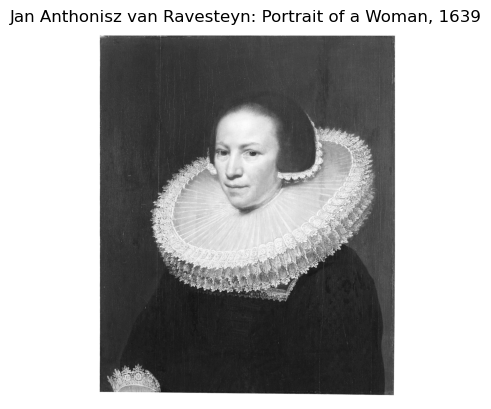

In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_ravesteyn = mpimg.imread("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/Jan_van_Ravensteyn_Portrait_of_a_Woman_1629.jpeg")
plt.imshow(img_ravesteyn, "gray")
plt.axis('off')
plt.title("Jan Anthonisz van Ravesteyn: Portrait of a Woman, 1639")
#image source: Wikipedia

Text(0.5, 1.0, 'Pierre-Auguste Renoir: Bathers with Crab, 1890-1899')

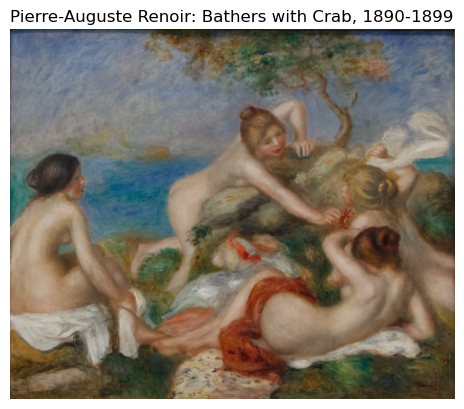

In [39]:
img_renoir = mpimg.imread("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/Bathers_with_Crab_c_1890-1899.jpeg")
plt.imshow(img_renoir)
plt.axis('off')
plt.title("Pierre-Auguste Renoir: Bathers with Crab, 1890-1899")
#image source: Wikipedia

# Fifth step
Checking from which country the artworks got to the USA. 

In [40]:
countries_list = countries['Countries'].tolist()

In [41]:
cmoa_ed["country_matches"]=""
for i in countries_list: 
      cmoa_ed["country_matches"] = np.where(cmoa_ed["provenance_text"].str.contains(i), i, cmoa_ed["country_matches"])
country=cmoa_ed[cmoa_ed["country_matches"]!=""]

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/3570059991.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/82/yw246zsn6wg4m9nr9sntt14m0000gn/T/ipykernel_29219/3570059991.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
cmoa_countries = country.groupby("country_matches").size()
cmoa_countries_df = pd.DataFrame(cmoa_countries).reset_index()
cmoa_countries_df
cmoa_countries_df1 = cmoa_countries_df.rename(columns={"country_matches": 'source'})
cmoa_countries_df2 = cmoa_countries_df1.rename(columns={0: 'weight'})
target = ["USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA"]
cmoa_countries_df2["target"]=target
cmoa_countries_df2

source  weight target
0         Belgium       1    USA
1  Czech Republic       1    USA
2          France      11    USA
3         Germany       5    USA
4        Hungary        1    USA
5           Italy       2    USA
6           Spain       1    USA
7     Switzerland       1    USA

In [43]:
import networkx as nx
G = nx.from_pandas_edgelist(cmoa_countries_df2, source="source", target="target", edge_attr="weight")
G
for source,target,edge_attrs in G.edges(data=True):
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            edge_attrs['value']=edge_attrs['weight']
        G.add_edge(str(source),str(target),**edge_attrs)

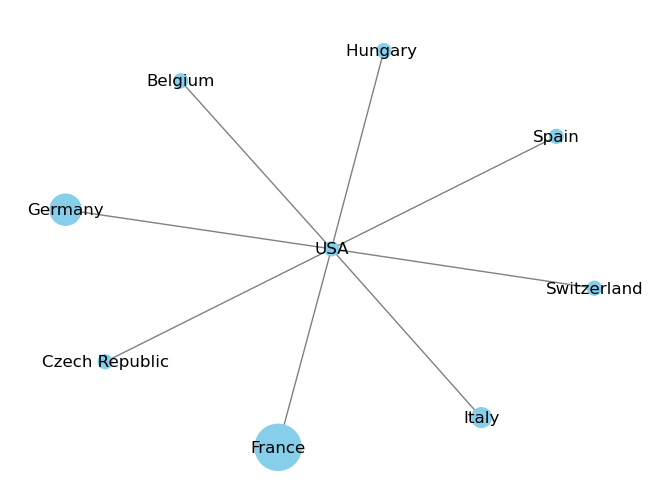

In [44]:
g = nx.from_pandas_edgelist(cmoa_countries_df2, source="source", target="target")
d = cmoa_countries_df2.groupby("source")["weight"].sum().to_dict()
for node in g.nodes:
    d.setdefault(node, 1)
nodes, values = zip(*d.items())
nx.draw(g, nodelist=list(nodes), node_size=[v * 100 for v in values], with_labels=True, node_color="skyblue", edge_color="gray")

##### Conlusion: Most of the artworks came from France to the USA and Germany ranks second. As most of the artists are from France this result is not suprising. But only two German artists are represented in the subset of the collection. The artworks originating from Germany warrant further investigation, especially considering the historical circumstances.

The following four paintings were sold during wartime in Germany, with three of them directly acquired by the American collector Howard A. Noble:
* Ernst Ludwig Kirchner: The Lighthouse of Fehmarn, 1912: Artist's Collection, until 1938; Stuttgarter Kunstkabinett through Roman Norbet Ketterer, Germany; purchased by Museum, March 1955.
* Adrien Ysenbrandt: Vision of Saint Ildephonsus, 1500-1550:  Julius Böhler, Munich, Germany, August 30, 1929 until at least January 16, 1935, stock no. 217-29; Howard A. Noble [1874-1964], Pittsburgh, PA by April 1944 until April 30, 1964.
* Nicolaes Maes: Portrait of a Woman by a Fountain, 1665: Private Collection, Frankfurt, Germany; Van Diemen Galleries; Howard A. Noble [1874-1964], Pittsburgh, PA by 1944 until April 30, 1964.
* Jan Anthoniszoon van Ravesteyn: Portrait of a Woman, 1629: Kurt Walter Bachstitz [1882-1949], The Hague, Netherlands. Howard A. Noble [1874-1964], Pittsburgh, PA until April 30, 1964.

Text(0.5, 1.0, 'Ernst Ludwig Kirchner: The Lighthouse of Fehmarn, 1912')

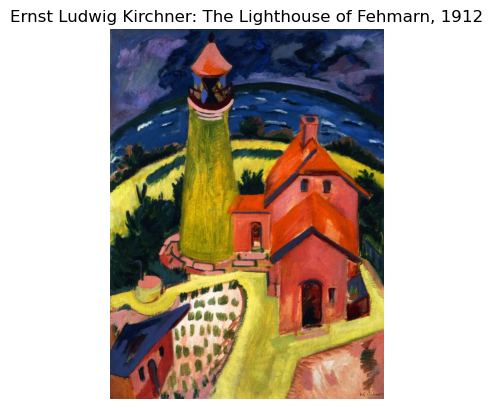

In [45]:
img_kirchner = mpimg.imread("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/The_Lighthouse_of_Fehmarn_Ernst_Ludwig_Kirchner.jpeg")
plt.imshow(img_kirchner)
plt.axis('off')
plt.title("Ernst Ludwig Kirchner: The Lighthouse of Fehmarn, 1912")
#image source: Wikipedia

Text(0.5, 1.0, 'Adrien Ysenbrandt: Vision of Saint Ildephonsus, 1500-1550')

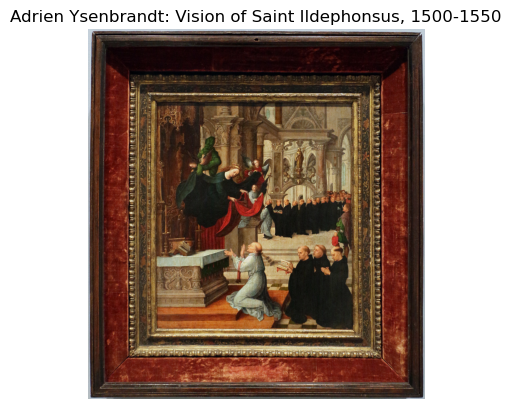

In [46]:
img_ysenbrandt = mpimg.imread("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/Adrien_ysenbrandt_visione_di_sant'ildefonso.jpeg")
plt.imshow(img_ysenbrandt)
plt.axis('off')
plt.title("Adrien Ysenbrandt: Vision of Saint Ildephonsus, 1500-1550")
#image source: Wikipedia

Text(0.5, 1.0, 'Nicolaes Maes: Portrait of a Woman by a Fountain, 1665')

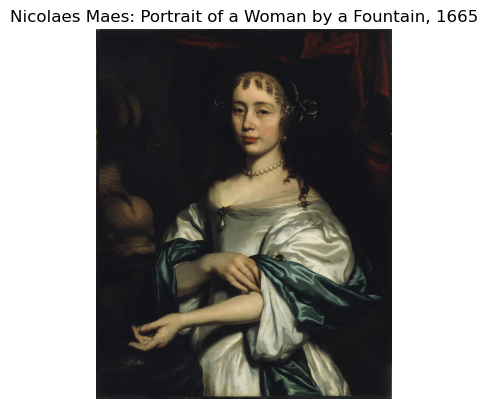

In [47]:
img_maes = mpimg.imread("/Users/rebekaerdo/Documents/Digital Humanities/Methodological course/Project/Nicolaes_Maes_Portrait_of_a_Woman_by_a_Fountain.jpeg")
plt.imshow(img_maes)
plt.axis('off')
plt.title("Nicolaes Maes: Portrait of a Woman by a Fountain, 1665")
#image source: Wikipedia

In my project, the main challenge was to filter out the information from an inconsistent text in a CSV file. The first step involved preparing the CSV file for reading in OpenRefine. I selected the subset of paintings and then removed unnecessary texts and inconsistent spellings using regex and manual editing.

After loading the file into the Kernel, I noticed that removing the dates in brackets deleted more text than expected, potentially leading to inaccurate results. To address this, I used the original column "provenance_text" for comparison with the list of names and countries. I began by comparing the last names, considering that the whole names could have different spellings. Then, to filter the results more accurately, I also used the first names. However, the names were not always detected precisely, as the provenance text might contain multiple names, and only the first match was printed. I had to compare the results with the original OSS_Names.csv file to confirm the correct name detection.

Determining the source country also posed challenges. The first match was copied in the "country_matches" column, and these may not necessarily represent the last European destinations before selling the artworks to an American collector.

In conclusion, I learned that CSV files should be prepared with the intended purpose in mind. For data visualization and quantitative research, it is essential to have more structured and consistent information.

Despite the challenges, I gained interesting insights from the dataset. The three paintings matching the names in the looting reports, the paintings located in Germany or France, and the collector Howard Agnew Noble are particularly noteworthy and worth further investigation.